In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts   
import pylab as plt
import seaborn as sns
import numpy as np
#modelos: regresiones y clasificación
#regresion lineal y regresiones
#lineal
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        
from sklearn.linear_model import Ridge        
from sklearn.linear_model import ElasticNet   
# support vector regressor
from sklearn.svm import SVR  # support vector regressor
#random forest
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
#boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
#clasificacion
from sklearn.linear_model import LogisticRegression
#clasificacion multi-etiqueta
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio
from sklearn.preprocessing import StandardScaler

In [2]:
#Importamos los datos 
salaries = pd.read_csv('../data/salaries_data.csv')
testeo = pd.read_csv('../data/testeo.csv')

In [3]:
salaries.shape

(500, 11)

In [4]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,USD,100000,US,100,US,M
496,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,USD,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,60000,GBP,82528,GB,100,GB,L


In [5]:
stats=salaries.describe().T
stats['IQR']=stats['75%']-stats['25%']
outliers=pd.DataFrame(columns=stats.index)
for c in stats.index:
    iqr=stats.at[c, 'IQR']
    cutoff=1.5 * iqr   # test de tukey
    lower=stats.at[c, '25%'] - cutoff
    upper=stats.at[c, '75%'] + cutoff
    res=salaries[(salaries[c] < lower) | (salaries[c] > upper)].copy()
    res['outliers']=c
    outliers=outliers.append(res, sort=True)
outliers['outliers'].value_counts()
clean_index=[i for i in salaries.index if i not in outliers.index]
salaries=salaries.iloc[clean_index]

In [6]:
salaries.shape

(463, 11)

In [7]:
#creamos la y
y = salaries.salary_in_usd

In [8]:
#juntamos los dos dataframes para hacerles los cambios a la vez

In [9]:
sal_test = pd.concat([salaries, testeo])

In [10]:
sal_test.shape

(570, 11)

In [11]:
sal_test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005.0,RO,0,US,L


In [12]:
#sal_test.drop(['salary_currency', 'salary', 'employee_residence'], axis = 1, inplace = True)

In [13]:
sal_test.drop(['salary_currency', 'salary', 'employee_residence'], axis = 1, inplace = True)

In [14]:
#vamos a ver los valores únicos de cada columna con categorías para pasarlas a numéricas

In [15]:
sal_test.experience_level.unique()
sal_test.employment_type.unique()
sal_test.job_title.unique()
sal_test.remote_ratio.unique()
sal_test.company_location.unique()
sal_test.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [16]:
#tipos de dato y nulos
sal_test.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 106
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         570 non-null    int64  
 1   experience_level  570 non-null    object 
 2   employment_type   570 non-null    object 
 3   job_title         570 non-null    object 
 4   salary_in_usd     463 non-null    float64
 5   remote_ratio      570 non-null    int64  
 6   company_location  570 non-null    object 
 7   company_size      570 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 189.4 KB


**OUTLIERS**

<AxesSubplot:>

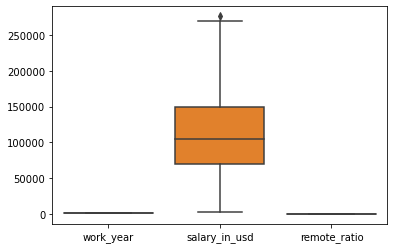

In [17]:
#outliers
sns.boxplot(data = sal_test)
#salary_in_usd nos da igual porque es la y la quitaremos

In [18]:
#probamos con get_dummies de todo
#sal_test=pd.get_dummies(sal_test, columns=['experience_level', 'employment_type', 'job_title',\
 #                                       'remote_ratio', 'company_location', 'company_size', 'work_year', 'employee_residence'], drop_first=True)


In [20]:
#ahora vamos a probar con un get_dummies de todo menos los años
sal_test=pd.get_dummies(sal_test, columns=['experience_level', 'employment_type', 'job_title',\
                                         #'remote_ratio', 
                                           'company_location', 'company_size'], drop_first=True)


**NORMALIZACIÓN**

In [21]:
#hacemos este bucle para sacar todas las columnas porque son muchísimas
cols = []
for e in sal_test.columns:
    cols.append(e)

scaler=StandardScaler() #aquí probamos a normalizar solo la columna de año
sal_test[['work_year', 'remote_ratio']] = scaler.fit_transform(sal_test[['work_year', 'remote_ratio']])


In [22]:
#le quitamos y a nuestro dataframe
sal_test.drop('salary_in_usd', axis = 1, inplace = True)

In [23]:
#volvemos a separar la muestra de testeo
sal_test1 = sal_test[0:463]
testeo = sal_test[463:]

In [24]:
X = sal_test1

In [25]:
pd.set_option('display.max_rows', None)

In [26]:
X.shape

(463, 102)

**PREDICCIONES**

Creando los 4 paquetes de datos

In [27]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((370, 102), (93, 102), (370,), (93,))

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 410 to 401
Columns: 102 entries, work_year to company_size_S
dtypes: float64(2), uint8(100)
memory usage: 44.8 KB


In [29]:
def predecir(x_train, x_test, y_train, y_test):
    #inicializamos todos los modelos que vamos a probar
    svr=SVR()
    rfr=RFR()
    etr=ETR()
    gbr=GBR()
    xgbr=XGBR()
    ctr=CTR()
    linreg=LinReg()
    lasso=Lasso()
    ridge=Ridge()
    elastic=ElasticNet()
    #lgbmr=LGBMR()
    #los entrenamos
    svr.fit(x_train, y_train)
    rfr.fit(x_train, y_train)
    etr.fit(x_train, y_train)
    gbr.fit(x_train, y_train)
    xgbr.fit(x_train, y_train)
    ctr.fit(x_train, y_train, verbose=0)
    linreg.fit(x_train, y_train)
    lasso.fit(x_train, y_train)
    ridge.fit(x_train, y_train)
    elastic.fit(x_train, y_train)
    #lgbmr.fit(x_train, y_train)
    #predecimos
    y_pred1 = svr.predict(x_test)
    y_pred2 = rfr.predict(x_test)
    y_pred3 = etr.predict(x_test)
    y_pred4 = gbr.predict(x_test)
    y_pred5 = xgbr.predict(x_test)
    y_pred6 = ctr.predict(x_test)
    y_pred7 = linreg.predict(x_test)
    y_pred8 = lasso.predict(x_test)
    y_pred9 = ridge.predict(x_test)
    y_pred10 = elastic.predict(x_test)
   # y_pred11 = lgbmr.predict(x_test)
    #calculamos error cuadrático medio (mse)
    mse1 = mse(y_test, y_pred1, squared=False)
    mse2 = mse(y_test, y_pred2, squared=False)
    mse3 = mse(y_test, y_pred3, squared=False)
    mse4 = mse(y_test, y_pred4, squared=False)
    mse5 = mse(y_test, y_pred5, squared=False)
    mse6 = mse(y_test, y_pred6, squared=False)
    mse7 = mse(y_test, y_pred7, squared=False)
    mse8 = mse(y_test, y_pred8, squared=False)
    mse9 = mse(y_test, y_pred9, squared=False)
    mse10 = mse(y_test, y_pred10, squared=False)
    #mse11 = mse(y_test, y_pred11, squared=False)
    #creamos una lista con todos los mse
    temp = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9, mse10] #mse11]
    #pedimos a la función que nos devuelva el valor más bajo de mse   
    minimo = min(temp)
    #le ponemos un mensajito para que quede más mono
    if minimo == mse1:
        return f'El mejor modelo es SVR con un mse de {mse1}'
    elif minimo == mse2:
        return f'El mejor modelo es RFR con un mse de {mse2}'
    elif minimo == mse3:
        return f'El mejor modelo es ETR con un mse de {mse3}'
    elif minimo == mse4:
        return f'El mejor modelo es GBR con un mse de {mse4}'
    elif minimo == mse5:
        return f'El mejor modelo es XGBR con un mse de {mse5}'
    elif minimo == mse6:
        return f'El mejor modelo es CTR con un mse de {mse6}'
    elif minimo == mse7:
        return f'El mejor modelo es LINREG con un mse de {mse7}'
    elif minimo == mse8:
        return f'El mejor modelo es LASSO con un mse de {mse8}'
    elif minimo == mse9:
        return f'El mejor modelo es RIDGE con un mse de {mse9}'
    elif minimo == mse10:
        return f'El mejor modelo es ELASTIC con un mse de {mse10}'
   # elif minimo == mse11:
      #  return f'El mejor modelo es LGBMR con un mse de {mse11}'

In [30]:
predecir(X_train, X_test, y_train, y_test)

'El mejor modelo es RIDGE con un mse de 34207.94432400609'

In [31]:
#Vamos a probar el modelo que nos ha dado la función con testeo
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(testeo)

In [32]:
#guardamos las predicciones en un nuevo dataframe y en un archivo csv
prueba = pd.DataFrame(y_pred, columns = ['salary_in_usd'])

In [33]:
prueba.to_csv('../data/prueba14.csv', index_label = 'ID')

In [34]:
#prueba8 es el que más bajo ha dado
#quitando employee_residence, normalizando work_year y quitando outliers es el mejor que da